    Assignmet - 2

```
Build a model using publicly available data for key supply-demand factors that could influence US home price. Use that to explain how these factors impacted home prices over the last ~20 years.
```

In [1]:
#import necessary libraries
import pandas as pd #for analysis
pd.set_option("display.max_column",None)
import numpy as np #for wrangling
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

## Datasets Representing Different Factors.

In [2]:
demand_factors = pd.read_csv('Data/demand_df')
demand_factors.drop("Unnamed: 0",axis=1,inplace=True)
demand_factors.head()

,DATE,Unemplyment_rate(%),Mortgage(%),GDP(Billions$),Delinquency_rate(%)
0,2000-01-01,4.03,8.26,12935.252,1.95
1,2000-04-01,3.93,8.32,13170.749,1.97
2,2000-07-01,4.00,8.02,13183.890,2.09
3,2000-10-01,3.90,7.62,13262.250,2.23
4,2001-01-01,4.23,7.01,13219.251,2.34


### Demand Factors:

   - <b> DATE </b> : Quaterly Data recorded between '2000 to 2020'
   <br>
  
   - <b>Unemplyment_rate(%)</b> : The unemployment rate represents the number of unemployed as a percentage of the labor force. [Data Source](https://fred.stlouisfed.org/series/UNRATE/)
   <br>
   - <b>Mortgage(%)</b> : The Mortgage rates represent the Mortgage Average Fixed Rate in the United States. [Data Source](https://fred.stlouisfed.org/series/MORTGAGE30US)
   <br>
   - <b>GDP(Billions$)</b> : Real gross domestic product is the inflation adjusted value of the goods and services produced by labor and property located in the United States. [Data Source](https://fred.stlouisfed.org/series/GDPC1)
   <br>
   - <b>Delinquency_rate(%)</b> : The delinquency rate refers to the percentage of loans that are past due. It indicates the quality of a lending company’s or a bank’s loan portfolio.. [Data Source](https://fred.stlouisfed.org/series/DRSFRMACBS)

In [3]:
supply_factors = pd.read_csv('Data/supply_df')
supply_factors.drop("Unnamed: 0",axis=1,inplace=True)
supply_factors.head()

,DATE,Permit,Total_constuctions,Homes_sold,New_projects,For_sale(%)
0,2000-01-01,1690,2388136,923,1659,1.6
1,2000-04-01,1570,2405182,916,1586,1.5
2,2000-07-01,1554,2403466,905,1503,1.6
3,2000-10-01,1578,2447670,904,1544,1.6
4,2001-01-01,1671,2456183,884,1605,1.5


### Supply Factors:

   - <b> DATE </b> : Quaterly Data recorded between '2000 to 2020'
   <br>
  
   - <b>Permit(%)</b> : Number of building permits allotted by the  U.S. Department of Housing and Urban Development. [Data Source](https://fred.stlouisfed.org/series/PERMIT#0)
   <br>
   - <b>Total Constuctions(%)</b> : The amount spent (in millions of USD) is a measure of the activity in the construction industry. [Data Source](https://fred.stlouisfed.org/series/TTLCONS#0)
   <br>
   - <b>Homes Sold</b> : House for sale is a basic measure of supply. [Data Source](https://fred.stlouisfed.org/series/HNFSEPUSSA#0)
   <br>
   - <b>New Projects(%)</b> : This is a measure of the number of units of new housing projects started in a given period. [Data Source](https://fred.stlouisfed.org/series/HOUST#0)
   <br>
   - <b>For Sale(%)</b> : The vacancy rate is the proportion of the homeowner inventory(in percentage) that is vacant for sale. [Data Source](https://fred.stlouisfed.org/series/RHVRUSQ156N#0)

In [4]:
Home_prices = pd.read_csv('Data/HPI')
Home_prices.drop("Unnamed: 0",axis=1,inplace=True)
Home_prices.head()

,DATE,Home_price
0,2000-01-01,101.339333
1,2000-04-01,103.674333
2,2000-07-01,105.786000
3,2000-10-01,108.274667
4,2001-01-01,110.483667


   - <b> DATE </b> : Quaterly Data recorded between '2000 to 2020'
   <br>
   
   - <b>Homes Prices</b> : Using the S&P Case-Schiller Home Price Index as a proxy for home prices. [Data Source](http://fred.stlouisfed.org/series/CSUSHPISA)

In [5]:
#Final Dataset
from functools import reduce

dfs = [demand_factors,supply_factors,Home_prices]

data = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how='inner'),dfs)
data.set_index("DATE", inplace=True)

display(data.head())

,Unemplyment_rate(%),Mortgage(%),GDP(Billions$),Delinquency_rate(%),Permit,Total_constuctions,Homes_sold,New_projects,For_sale(%),Home_price
DATE,,,,,,,,,,
2000-01-01,4.03,8.26,12935.252,1.95,1690,2388136,923,1659,1.6,101.339333
2000-04-01,3.93,8.32,13170.749,1.97,1570,2405182,916,1586,1.5,103.674333
2000-07-01,4.00,8.02,13183.890,2.09,1554,2403466,905,1503,1.6,105.786000
2000-10-01,3.90,7.62,13262.250,2.23,1578,2447670,904,1544,1.6,108.274667
2001-01-01,4.23,7.01,13219.251,2.34,1671,2456183,884,1605,1.5,110.483667


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2000-01-01 to 2020-10-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unemplyment_rate(%)  84 non-null     float64
 1   Mortgage(%)          84 non-null     float64
 2   GDP(Billions$)       84 non-null     float64
 3   Delinquency_rate(%)  84 non-null     float64
 4   Permit               84 non-null     int64  
 5   Total_constuctions   84 non-null     int64  
 6   Homes_sold           84 non-null     int64  
 7   New_projects         84 non-null     int64  
 8   For_sale(%)          84 non-null     float64
 9   Home_price           84 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 7.2+ KB


```
The final dataset which is created from merging multiple dataframes contains 'Quaterly Data' reading of diffrent major factors that affect the price of a House in United States, The data present is recorded between the years '2000 to 2020'.
These factors are categorized into 'DEMAND' and 'SUPPLY' classes, From this classification we are going to understand the hidden anamolies present in the data to figure out what all factors have to offer in the contribution of fluctuations occuring in Home Price value.
```

## Correlation Analysis

Firstly, as the data is clean and balanced we are going to check the correlation between the data to find insights.

We will be using <b>Spearman's Rank Correlation Coefficient</b>, its mathematical calculation.

Spearman rank correlation coefficient measures the monotonic relation between two variables. Its values range from `-1 to +1` and can be interpreted as:

- `+1: Perfectly monotonically increasing relationship`
- `+0.8: Strong monotonically increasing relationship`
- `+0.2: Weak monotonically increasing relationship`
- `0: Non-monotonic relation`
- `-0.2: Weak monotonically decreasing relationship`
- `-0.8: Strong monotonically decreasing relationship`
- `-1: Perfectly monotonically decreasing relationship`

How does it work:

- "A non-monotonic function is where the increase in the value of one variable can sometimes lead to an increase        and sometimes lead to a decrease in the value of the other variable."
- "For a monotonically increasing function, as X increases, Y also increases (and it doesn't have to be linear)".
- "For a monotonically decreasing function, as one variable increases, the other one decreases (also doesn't have to be linear)".

,Unemplyment_rate(%),Mortgage(%),GDP(Billions$),Delinquency_rate(%),Permit,Total_constuctions,Homes_sold,New_projects,For_sale(%),Home_price
Unemplyment_rate(%),1.000000,-0.219089,-0.148412,0.558652,-0.528377,-0.505038,-0.476042,-0.541645,0.486001,-0.398759
Mortgage(%),-0.219089,1.000000,-0.834040,-0.543168,0.453560,-0.415015,0.615755,0.473214,0.221482,-0.488967
GDP(Billions$),-0.148412,-0.834040,1.000000,0.443840,-0.391864,0.685066,-0.365530,-0.408896,-0.238400,0.776228
Delinquency_rate(%),0.558652,-0.543168,0.443840,1.000000,-0.958949,-0.232627,-0.812674,-0.959936,0.403955,-0.061366
Permit,-0.528377,0.453560,-0.391864,-0.958949,1.000000,0.221001,0.685293,0.993135,-0.484478,0.043101
Total_constuctions,-0.505038,-0.415015,0.685066,-0.232627,0.221001,1.000000,0.335854,0.208984,-0.360157,0.949641
Homes_sold,-0.476042,0.615755,-0.365530,-0.812674,0.685293,0.335854,1.000000,0.692718,-0.017279,0.225769
New_projects,-0.541645,0.473214,-0.408896,-0.959936,0.993135,0.208984,0.692718,1.000000,-0.465756,0.025828
For_sale(%),0.486001,0.221482,-0.238400,0.403955,-0.484478,-0.360157,-0.017279,-0.465756,1.000000,-0.222646
Home_price,-0.398759,-0.488967,0.776228,-0.061366,0.043101,0.949641,0.225769,0.025828,-0.222646,1.000000


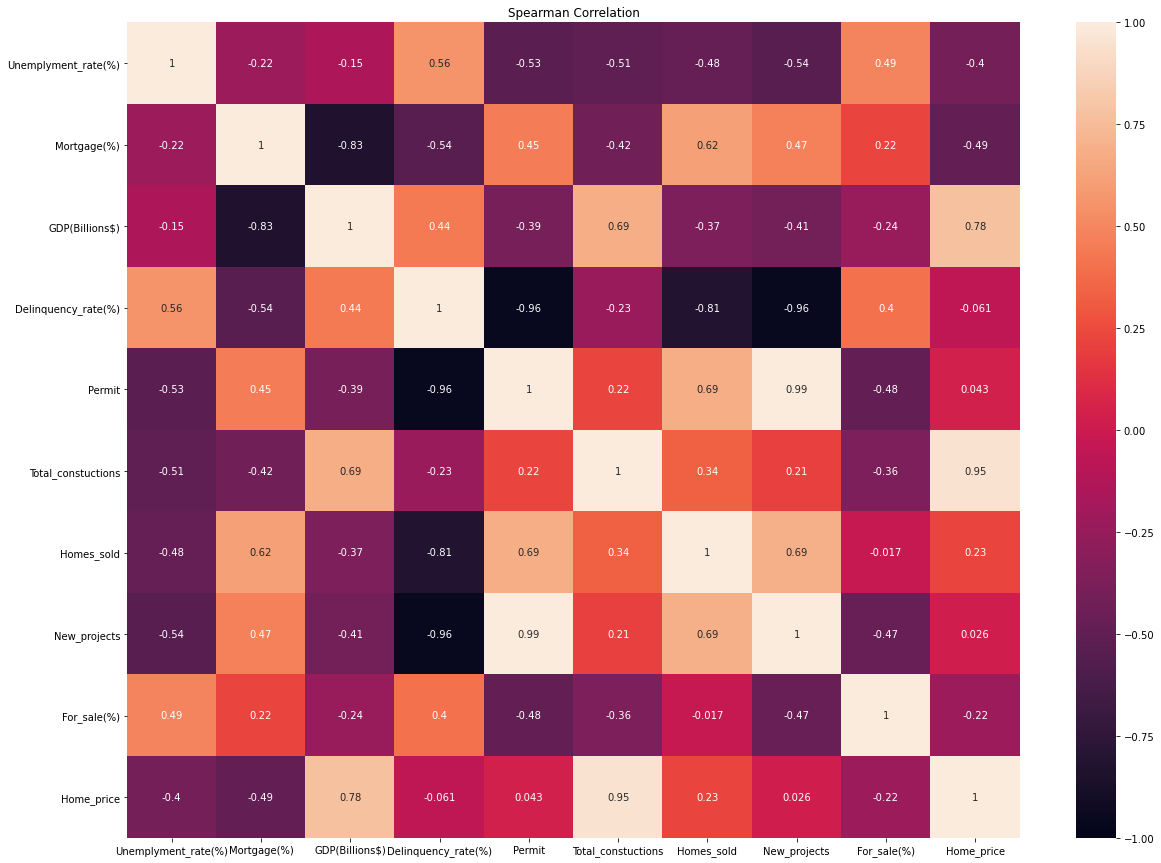

In [7]:
#Let us define a display_correlation() function that computes the correlation coefficient
def display_correlation(data):
    r = data.corr(method="spearman")
    plt.figure(figsize=(20,15))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

#Lets correlate dataset and visualize it using heatmap
display_correlation(data)

From the above correlation it can observed that factors like 'Total Construction' & 'GDP' have a strong impact on Home price. These factors have a '+0.8: Strong monotonically increasing relationship' according to spearman correlation. Apart from these there are alot of factors that can be observed.

Some key takeaway points from above heatmap are:

 1.  <b>Unemplyment Rate</b> : Highest measure `0.56` , Lowest measure `-0.54`
     
     - `0.56` between Delinquecy rates and Unemployment. It is visible that as Delinquecy rates rises monotonically         with unemplyment inncreasing.
     - `-0.54` between New projects rates and Unemployment. With increasing unemplyment there is a noted decrease           in New projects.
     
     <br>
 2.  <b>Mortgage</b> : Highest measure `0.62` , Lowest measure `-0.83`
     
     - `0.62` between Homes sold and Mortgage. It is understandable that the more people take mortgage, the more           houses are going to be sold.
     - `-0.83` between GDP and Mortgage. But with less people taking mortgage it causes an big impact to GDP of             country.
     
     <br>
 3.  <b>GDP</b> : Highest measure `0.78` , Lowest measure `-0.83`
     
     - `0.78` between Homes price and GDP. The higher GDP rises the better it is for the housing market or any             market in general
     - `-0.83` between GDP and Mortgage. Less people taking mortgage it causes an big impact to GDP of country.
     
     <br>
 4.  <b>Delinquency Rate</b> : Highest measure `0.56` , Lowest measure `-0.96`
     
     - `0.56` between Delinquecy rates and Unemployment. Delinquecy rates rises monotonically with unemplyment             inncreasing.
     - `-0.96` of Delinquency Rates is with both Permit and New projects. Due to more percentage of Delinquecy             rates, permits are not given by the goverment which affects in less new projects being built.
     
     <br>
 5.  <b>Permit</b> : Highest measure `0.99` , Lowest measure `-0.96`
     
     - `0.56` between new projects and Permit. Which is evident because permits are required to build new house.
     - `-0.96` between Delinquecy rates and Permit. Due to more percentage of Delinquecy rates, permits are not             given by the goverment.
     
     <br>
 6.  <b>Total Constuctions</b> : Highest measure `0.95` , Lowest measure `-0.51`
     
     - `0.95` between House prices and Total Constuctions. Which tells us that if construction increase they create         demand and that demand increses the asset value.
     - `-0.51` between Unemployment and Total Constuctions. Construction bring employment inform of labour which           inpacts in unemplyment decreasing.
     
     <br>
 7.  <b>Homes Sold</b> : Highest measure `0.69` , Lowest measure `-0.81`
     
     - `0.69` of Homes Sold is with both Permit and New projects. Because houses being sold Creates supply and to           fill the gap, demand raises to build new projects and permits are necessary for it.
     - `-0.81` between Delinquecy rates and Homes Sold. Home's being sold decreses Delinquecy percentile rates.
     
     <br>
 8.  <b>New Projects</b> : Highest measure `0.99` , Lowest measure `-0.96`
     
     - `0.99` between new projects and Permit. Which is evident because permits are required to build new house.
     - `-0.96` between Delinquecy rates and new projects Constuctions.  Due to more percentage of Delinquecy             rates, permits are not given by the goverment which affects in less new projects being built.
     
     <br>
 9.  <b>For Sale</b> : Highest measure `0.49` , Lowest measure `-0.48`
     
     - `0.49` between Unemployment and For sale. More vacant properties creates unwanted extra supply.
     - `-0.48` between Permit and For sale. Excess vacant houses will provide supply enough that new projects might         halt and permits might not require.

<h3>The above study shows us how the key supply-demand factors taken in consideration could influence US home prices.</h3>